In [126]:
import networkx as nx
import numpy as np
from scipy.sparse import lil_matrix, diags, random
import matplotlib.pyplot as plt

# Define a method to create the barabasi method

In [127]:
def Barabasi(n, m, clique_size=4, alpha=1):
	"""_summary_

	Args:
		n (int): number of nodes in graph
		m (int): number of links for each nodes NB: m>=n
		clique_size (int, optional): default size of starting clique. Defaults to 4.
		alpha (int, optional): valore che va a modellare la non linearità: se alpha = 1 allora ho il caso di 
		base di comportamento lineare (quello di base di barabasi). se a>2 allora do moltissima 
		importanza al valore di k: pochi nodi diventano super hub. altrimenti se a<1 alora ho
		la power low che cresce piu lineare e quindi ho tutti i nodi che tendono a 
		avere una distribuzione dei degree più lineari (ion scala logaritmica ovviamente). Defaults to 1.

	Returns:
		lil_matrix:  The Barabasi graph created
	"""
	
	assert(m<=clique_size and n>=clique_size) #the clique to start is made with four nodes...

	#clicque of clique_size nodes, done with a sparse matrix of size m0xmo
	ones = np.ones(n) #lo uso solo per andare a calcolare i degree dei vari nodi nella mia matrice
	#creo la lista dei nodi 
	nodeList = np.arange(n)
	#crwo matrice di adiacenza
	AdjacentMatrix = lil_matrix((n,n))
	
	#creo una clicca completa
	AdjacentMatrix[0:clique_size,0:clique_size] = 1
	AdjacentMatrix.setdiag(0)


	for i in range(clique_size,n):
		#calcolo il degree vector
		k = AdjacentMatrix[:i,:i] @ ones[:i] #con la @ faccio prodotto vettoriale
		#Vado a cambiare come sono calcolate le probabilità in base a come 
		#vado a passare il parametro ext
		

		probs = k**(-alpha) / sum(k**(-alpha))

		
		#calcolo i target di aggiunta per il nodo i
		#seleziono m archi, ognuno dei quali è in nodeList e viene selezionato
		#con probabilità probs_i. il replace fa in modo che una volta preso non 
		#viene rimesso in nodeList e quindi non viene messo!
		destList = np.random.choice(nodeList[:i], m, p=probs, replace=False)
		AdjacentMatrix[i, destList] = AdjacentMatrix[destList, i] =1

	
	return AdjacentMatrix


#  check that the barabasi matrix is symmetric

It is as, when we build the matrix, we assign the value 1 in a symmetric way!

# Plot the degree distribution and check that it decays with $k^{-3}$

In [128]:
G = Barabasi(1000,8,10, alpha=1) #con a=1 abbiamo un comportamento di base

(array([194., 229., 185., 149.,  98.,  62.,  42.,  19.,  12.,  10.]),
 array([ 8. , 10.9, 13.8, 16.7, 19.6, 22.5, 25.4, 28.3, 31.2, 34.1, 37. ]),
 <BarContainer object of 10 artists>)

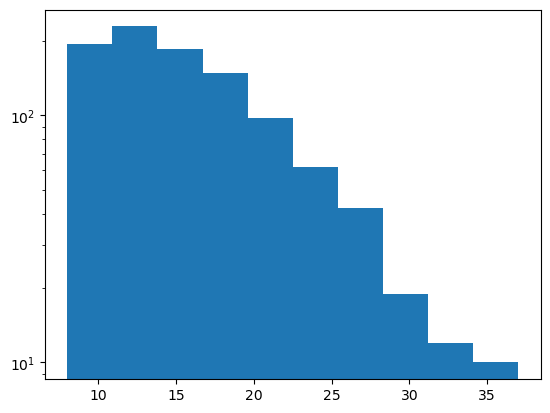

In [129]:
#estraggo i gradi del grafico
k = G @ np.ones(1000)
plt.hist(k, log=True)

Text(0, 0.5, 'Frequency')

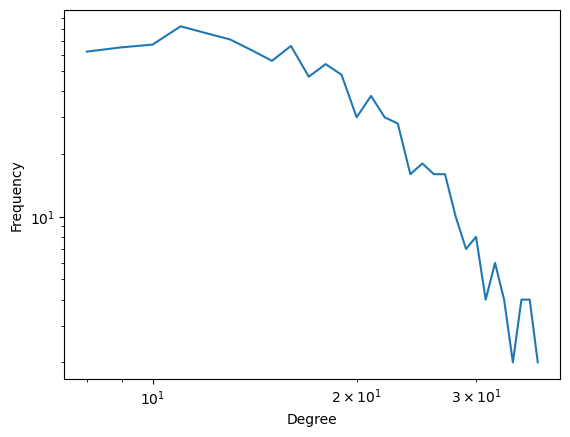

In [130]:


x,y = np.unique(k, return_counts=True)
plt.loglog(x,y)
plt.xlabel("Degree")
plt.ylabel("Frequency")

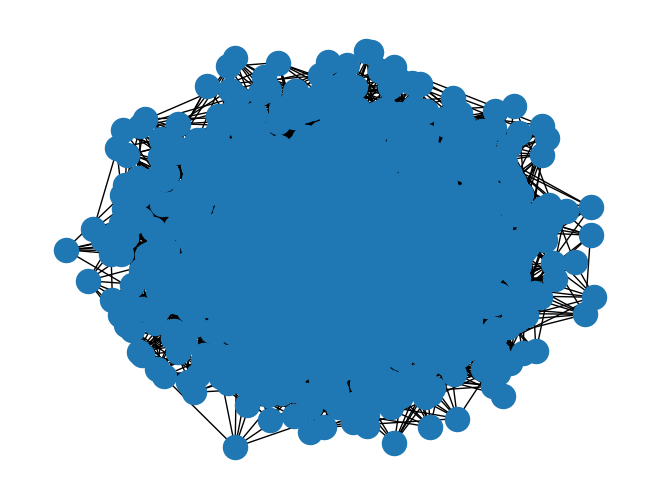

In [131]:
#Plot del grafico con networkX

nxG = nx.from_scipy_sparse_array(G)
nx.draw(nxG)